In [124]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Question 1

In [125]:
df = pd.read_csv('../data_sets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [126]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

x = df.drop(['Gender'], axis=1, inplace=False)
y = df['Gender']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [128]:
# Logistic regression
metrics_name = []
log_r_metrics = []

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_r = LogisticRegression(max_iter=300)
log_r.fit(xtrain, ytrain)

pred = log_r.predict(xtest)
print("Accuracy : ", metrics.accuracy_score(ytest, pred))

metrics_name.append('Accuracy')
log_r_metrics.append(metrics.accuracy_score(ytest, pred))

metrics_name.append('R2 score')
log_r_metrics.append(log_r.score(xtest, ytest))

Accuracy :  0.5166666666666667


In [129]:
# Decision Tree
from sklearn import tree

tree_metrics = []

decision_tree = tree.DecisionTreeClassifier(max_depth=1000, random_state=100)
decision_tree = decision_tree.fit(xtrain, ytrain)
pred = decision_tree.predict(xtest)

print("Accuracy : ", metrics.accuracy_score(ytest, pred))

tree_metrics.append(metrics.accuracy_score(ytest, pred))

tree_metrics.append(log_r.score(xtest, ytest))

Accuracy :  0.5166666666666667


<AxesSubplot: >

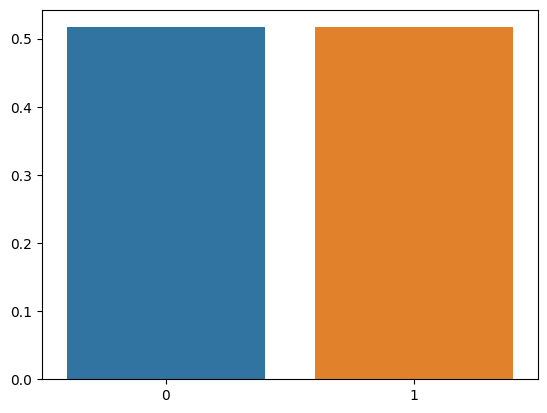

In [130]:
sb.barplot(data=[log_r_metrics, tree_metrics])

Question 2

In [131]:
df = pd.read_csv('../data_sets/winequality-red.csv')
print(df.columns)
df = df.iloc[:]
df = pd.DataFrame(df, columns=df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [132]:
df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [133]:
# Random forest
from sklearn.model_selection import train_test_split

x = df.drop(['quality'], axis=1, inplace=False)
y = df['quality']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [134]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [20,50,100]
accuracy = []

for estim in n_estimators:
    forest = RandomForestClassifier(n_estimators=estim, random_state=100)
    forest.fit(xtrain, ytrain)
    pred = forest.predict(xtest)

    from sklearn import metrics
    print("Accuracy : ", metrics.accuracy_score(ytest, pred))
    accuracy.append(metrics.accuracy_score(ytest, pred))

Accuracy :  0.6666666666666666
Accuracy :  0.6791666666666667
Accuracy :  0.675


<AxesSubplot: >

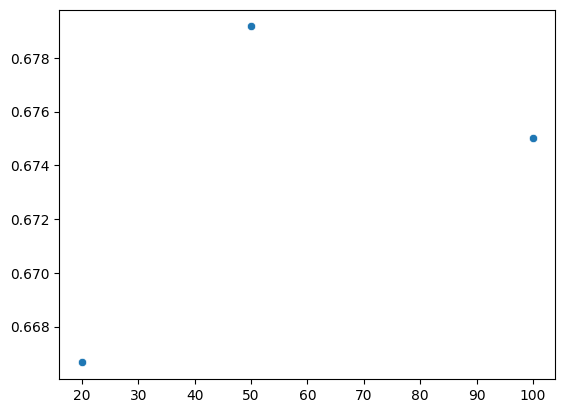

In [135]:
sb.scatterplot(x=n_estimators, y=accuracy)